In [63]:
library(tidyverse)
library(haven)
library(dplyr)

install.packages("stargazer")
library(stargazer)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [53]:
cchs <- read_dta("CCHS_Annual_2017_2018_curated_trimmed_25%.dta",
                 encoding = NULL,
                 c(hwtdgbmi,
                   hwtdgisw,
                   GEN_010,
                   dhhgage,
                   CCC_095,
                   DHH_SEX,
                   paadvacv),
                 skip = 0,
                 n_max = Inf,
                 .name_repair = "unique") %>%
        drop_na() %>% 
        filter(hwtdgbmi != 999.96&999.99  & hwtdgisw != 6&9 & GEN_010 != 97&98&99 & dhhgage != 01&02 & paadvacv != 6&9) %>%
        rename("BMI" = "hwtdgbmi",
               "BMI_group" = "hwtdgisw",
               "happy_score" = "GEN_010",
               "age" = "dhhgage",
               "diabetes" = "CCC_095",
               "gender" = "DHH_SEX",
               "fitness" = "paadvacv") %>%
        mutate(BMI_group = as_factor(BMI_group), 
               diabetes = as_factor(diabetes), 
               BMI_group = as_factor(BMI_group),
               gender = as_factor(gender),
               fitness = as_factor(fitness)) %>% 
        mutate(fitness = case_when(
            fitness == "Physically active at / above recommended level from CPAG" ~ "High activity",
            fitness == "Physically active below recommended level from CPAG" ~ "Low activity",
            fitness == "No physical activity minutes reported" ~ "No activity")) %>%
        mutate(across(c('BMI'), round, 0))


head(cchs)

gender,age,happy_score,BMI,BMI_group,diabetes,fitness
<fct>,<dbl+lbl>,<dbl+lbl>,<dbl>,<fct>,<fct>,<chr>
Female,9,10,20,Normal weight,No,Low activity
Female,10,6,23,Normal weight,No,No activity
Female,14,10,29,Overweight,No,High activity
Female,12,8,27,Overweight,No,Low activity
Male,7,9,24,Normal weight,No,High activity
Male,11,6,29,Overweight,No,Low activity


In [4]:
summary1 <- select(cchs, happy_score, BMI) %>%
            group_by(BMI) %>% 
            summarise(Mean_happyscore = mean(happy_score), 
                      Min_happyscore = min(happy_score),
                      Max_happyscore = max(happy_score), 
                      Sd_happyscore = sd(happy_score)) %>%
            ungroup()

summary1

BMI,Mean_happyscore,Min_happyscore,Max_happyscore,Sd_happyscore
<dbl>,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl>
13,9.000000,9,9,NA
15,6.500000,5,8,1.290994
16,8.000000,4,10,1.450953
17,7.878261,0,10,1.660415
18,8.039344,0,10,1.756124
19,8.070978,0,10,1.629994
20,8.185824,0,10,1.557449
21,8.190125,0,10,1.605886
22,8.184726,0,10,1.612476


Don't know how to automatically pick scale for object of type haven_labelled/vctrs_vctr/double. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



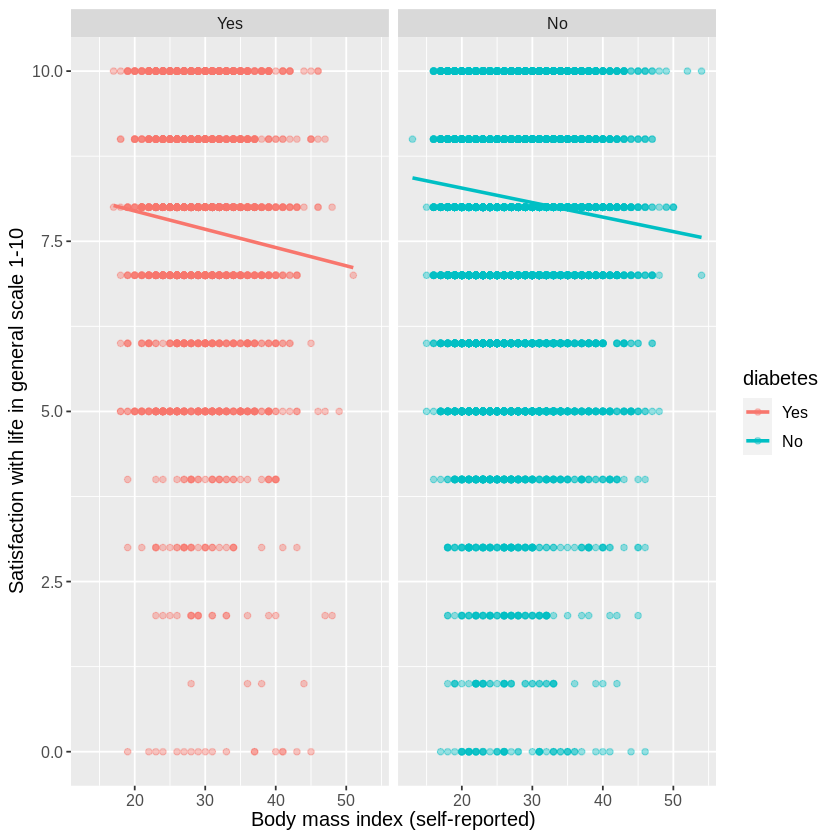

In [5]:
plot <- ggplot(cchs, aes(x = BMI, y = happy_score, color = diabetes)) +
  geom_point(alpha = 0.4) +
  xlab("Body mass index (self-reported)") +
  ylab("Satisfaction with life in general scale 1-10") +
  geom_smooth(method = "lm", se = FALSE) +
  facet_wrap(~ diabetes) + 
  theme(text = element_text(size = 12))

plot

In [6]:
summary1 <- select(cchs, happy_score, BMI) %>%
            group_by(BMI) %>% 
            summarise(Mean_happyscore = mean(happy_score), 
                      Min_happyscore = min(happy_score),
                      Max_happyscore = max(happy_score), 
                      Sd_happyscore = sd(happy_score)) %>%
            ungroup()

summary1

BMI,Mean_happyscore,Min_happyscore,Max_happyscore,Sd_happyscore
<dbl>,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl>
13,9.000000,9,9,NA
15,6.500000,5,8,1.290994
16,8.000000,4,10,1.450953
17,7.878261,0,10,1.660415
18,8.039344,0,10,1.756124
19,8.070978,0,10,1.629994
20,8.185824,0,10,1.557449
21,8.190125,0,10,1.605886
22,8.184726,0,10,1.612476


In [145]:
# Model 1: Linear functional form
lm1 <- lm(data = cchs, happy_score ~ BMI)

# Model 2: Quadratic functional form
lm2 <- lm(data = cchs, happy_score ~ BMI+I(log(BMI))+diabetes+ age+ gender + fitness)

# Model 3: Logarithmic functional form
lm3 <- lm(data = cchs, happy_score ~ BMI*di +I(log(BMI))+diabetes+ age+ gender + fitness)

# Compare models using adjusted R-squared
summary(lm1)$adj.r.squared
summary(lm2)$adj.r.squared
summary(lm3)$adj.r.squared

# Compare models using F-test and t-tests
anova(lm1, lm2)
anova(lm1, lm3)
summary(lm2)$coef
summary(lm3)$coef
 

[1] 0.004894601

[1] 0.02128139

[1] 0.0212686

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,23848,69138.47,NA,NA,NA,NA
2,23842,67982.83,6,1155.639,67.54828,1.082196e-83


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,23848,69138.47,NA,NA,NA,NA
2,23841,67980.87,7,1157.601,57.99609,6.615985e-83


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-4.446841867,1.073278823,-4.143231,3.436275e-05
BMI,-0.211765051,0.016642239,-12.724553,5.698175e-37
I(log(BMI)),5.437287102,0.463311290,11.735710,1.022382e-31
diabetesNo,0.355650334,0.039127801,9.089454,1.070898e-19
age,0.008628671,0.003264274,2.643366,8.213993e-03
genderFemale,0.105354374,0.022490611,4.684371,2.823688e-06
fitnessLow activity,-0.163815848,0.027353933,-5.988749,2.144886e-09
fitnessNo activity,-0.331341093,0.028548848,-11.606111,4.650488e-31


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-4.760876900,1.138082181,-4.1832453,2.884047e-05
BMI,-0.209074090,0.016955502,-12.3307517,7.900811e-35
diabetesNo,0.525793153,0.208787672,2.5183151,1.179827e-02
I(log(BMI)),5.506357198,0.470735370,11.6973517,1.603534e-31
age,0.008702653,0.003265513,2.6650184,7.703596e-03
genderFemale,0.105329061,0.022490779,4.6832109,2.839713e-06
fitnessLow activity,-0.163801831,0.027354117,-5.9881966,2.152177e-09
fitnessNo activity,-0.331121270,0.028550264,-11.5978355,5.119975e-31
BMI:diabetesNo,-0.005785540,0.006973833,-0.8296069,4.067694e-01


In [150]:
simple <- lm(data = cchs, happy_score ~ BMI) #the effect of gender on wealth
multi <- lm(data = cchs, happy_score ~ BMI + diabetes)
interaction <- lm(data = cchs, happy_score ~ BMI*diabetes) #the interaction of BMI and diabetes on happpiness
nonlinear <- lm(data = cchs, happy_score ~ BMI*diabetes + I(log(BMI)))
controls <- lm(data = cchs, happy_score ~ BMI +I(log(BMI))+diabetes+ age+ gender + fitness)

stargazer(simple, multi, interaction, nonlinear,controls, title="Comparison of Regression Results",
          align = TRUE, type="text", keep.stat = c("n","rsq"))


Comparison of Regression Results
                                   Dependent variable:               
                    -------------------------------------------------
                                       happy_score                   
                       (1)       (2)       (3)       (4)       (5)   
---------------------------------------------------------------------
BMI                 -0.023*** -0.019*** -0.027*** -0.209*** -0.212***
                     (0.002)   (0.002)   (0.007)   (0.017)   (0.017) 
                                                                     
diabetesNo                    0.393***    0.135   0.585***  0.356*** 
                               (0.038)   (0.206)   (0.209)   (0.039) 
                                                                     
age                                                         0.009*** 
                                                             (0.003) 
                                                        

In [ ]:
library(lmtest)
stargazer(bptest(simple), bptest(multi), bptest(interaction), bptest(nonlinear),bptest(controls), title="Comparison of Regression Results",
          align = TRUE, type="text", keep.stat = c("n","rsq"))